<img src="https://upload.wikimedia.org/wikipedia/en/5/5e/Munster_Technological_University_Logo%2C_2021.jpg">

#Applied Machine Learning (Dr. Haithem Afli) – Project 1 Assignment - Spam Classifier
##Orlando Jr R00224938


<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/spam.jpg"/>

## Introduction
###This project will explore the Enron email dataset, a public dataset that classified all messages as "SPAM" and "NON-SPAM", here called "HAM". The aim is also split the dataset in Train and Test, display some information in the EDA and finally create a supervised classification pipeline.
###This notebook will be commented in form to explain the most important steps and intentionally works like a report.

###The files and codes are stored in the following address: https://github.com/orlandojrps/spam

#Importing Libraries and Packages
<img src ="https://raw.githubusercontent.com/orlandojrps/spam/main/lib.png">

In [1]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
import pickle
from sklearn.model_selection import cross_val_score
import zipfile
import urllib.request
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
import sklearn.naive_bayes 
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
import spacy 
from tqdm.notebook import tqdm as PROG_BAR 
from sklearn.feature_extraction.text import CountVectorizer
plt.rcParams['figure.figsize'] = [4, 4]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [132]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


#Preprocessing

<img src ="https://raw.githubusercontent.com/orlandojrps/spam/main/load.png"/>

##Extract, Load, Transform
####The emails are stored in a zip file, separeted into 2 folders. To make acessible to further studies the dataset was uploaded to a Github folder. The emails will be loaded from the zip to a Dataframe.

In [205]:
file = "https://github.com/orlandojrps/spam/blob/8ab6bd3c9f131cc57a6664a5e16879b779dc157d/enron1.zip?raw=true"
name, headers = urllib.request.urlretrieve(file, 'enron1.zip')

with zipfile.ZipFile(name, 'r') as zip_ref:
  zip_ref.extractall('')

emails = []
for folder in ['ham', 'spam']:
    path = 'enron1/{}'.format(folder)
    for file in os.listdir(path):
        with open('{}/{}'.format(path, file), 'r', encoding='ISO-8859-1') as f:
            content = f.read()
        emails.append({'message': content, 'classification': folder})

df = pd.DataFrame(emails)


###Inspecting content of the Dataset:

In [3]:
df

,message,classification
0,Subject: revision # 1 - enron / hpl actuals fo...,ham
1,"Subject: hpl nom for may 8 , 2001\n( see attac...",ham
2,Subject: tetco / hpl ( enerfin ) meter # 98689...,ham
3,"Subject: january , 2001 devon availabilities ....",ham
4,"Subject: wellhead volumes\ndaren ,\nplease cli...",ham
...,...,...
5167,Subject: select eshopping for medicines and ta...,spam
5168,"Subject: re : your account # ln 869\nhi ,\ni s...",spam
5169,Subject: get back to me please\nonce south cam...,spam
5170,Subject: hi there buddy - feel the vitality\nf...,spam


In [4]:
df.shape

(5172, 2)

####Extraction and Loading well succeeded! Our dataset has 2 Columns (Message and Classification) with a total of 5172 observations (rows) 

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/cleaning.jpg">

###Let's checking for missing values, repeaded observations and remove from ourdataset if present

In [ ]:
df.isnull().sum()

message           0
classification    0
dtype: int64

In [ ]:
df.isna().sum()

message           0
classification    0
dtype: int64

In [206]:
duplicated_rows = df.duplicated()
duplicated_df = df.loc[duplicated_rows]
df.duplicated().sum()

178

In [204]:
duplicated_df

,message,classification
119,Subject: calpine daily gas nomination\n>\nrick...,ham
353,Subject: calpine daily gas nomination\n>\nrick...,ham
430,Subject: calpine daily gas nomination\n>\nrick...,ham
615,Subject: calpine daily gas nomination\n>\nrick...,ham
721,Subject: calpine daily gas nomination\n>\nrick...,ham
...,...,...
4984,Subject: \nthe permanent fix to penis growth\n...,spam
5010,"Subject: your contact info\n? "" ? ? ?  ?  ? ...",spam
5062,Subject: only $ 16 per malboro carton\ntired o...,spam
5088,Subject: we ' ve found a school for you !\n,spam


####No missing values but 178 occurrences of repeated observations. Let's explore a little more and check those messages, next step is drop the repetitions:

In [ ]:
df[df. duplicated()]

,message,classification
119,Subject: calpine daily gas nomination\n>\nrick...,ham
353,Subject: calpine daily gas nomination\n>\nrick...,ham
430,Subject: calpine daily gas nomination\n>\nrick...,ham
615,Subject: calpine daily gas nomination\n>\nrick...,ham
721,Subject: calpine daily gas nomination\n>\nrick...,ham
...,...,...
4984,Subject: \nthe permanent fix to penis growth\n...,spam
5010,"Subject: your contact info\n? "" ? ? ?  ?  ? ...",spam
5062,Subject: only $ 16 per malboro carton\ntired o...,spam
5088,Subject: we ' ve found a school for you !\n,spam


In [207]:
df.drop_duplicates(inplace=True)

In [9]:
df[df. duplicated()]

,message,classification


####Duplicateds removed 

####Now the clean Dataset has the format of 4994 row with 2 columns.

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/train_test.jpg">

#Train and Test Split
The dataset will be divided into Train with 70% and test with 30% of the observations. To this task it ill be used the method "train_test_split" from Sklearn. To avoid Bias in the sampling process it will be used a parameter called "stratify" to keep the proportion of classes in the train part similar to the original dataset.

###First it's important to check the proportion of classes (Spam - Ham) in the original dataset, to compare later with the dataset divided to make sure that the proportion was mantained.

In [208]:
print("Raw dataset statistics:")
print(f"Total emails: {len(df)}")
print(f"Spam emails: {len(df[df['classification'] == 'spam'])}")
print(f"Non-spam emails: {len(df[df['classification'] == 'ham'])}")
print(f"Spam ratio: {len(df[df['classification'] == 'spam'])/len(df)}")

Raw dataset statistics:
Total emails: 4994
Spam emails: 1463
Non-spam emails: 3531
Spam ratio: 0.29295154185022027


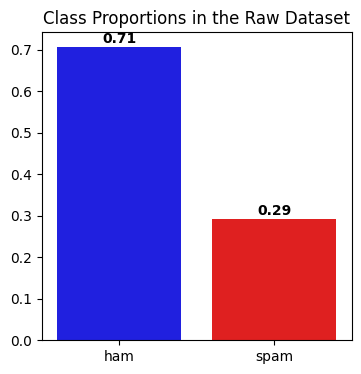

In [209]:
class_prop = df['classification'].value_counts(normalize=True)
ax=sns.barplot(x=class_prop.index, y=class_prop.values, palette=['blue', 'red'])
for i, v in enumerate(class_prop.values):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', fontweight='bold')
plt.title('Class Proportions in the Raw Dataset');

###Spliting Dataset:

In [210]:
# define a feature do modelo
X = df.message.values.reshape(-1, 1)
# define a target do modelo
y = df.classification.values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=df["classification"], random_state=4938) # my student number

##Removing the Stop Words. <br/>
<img src = "https://raw.githubusercontent.com/orlandojrps/spam/main/stopword.jpg">

In [211]:
stop_words = set(stopwords.words('english'))#reference: https://pythonspot.com/nltk-stop-words/

In [212]:
#If want to add more stop words
new_stopwords = ["back"] #test
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(new_stopwords)

In [213]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [214]:
#Revert to DF to be able to use apply() method to remove stopwords
X_train= pd.DataFrame(X_train,columns=['message'])
X_test= pd.DataFrame(X_test,columns=['message'])


In [215]:
# Remove stop words from the text data. Font: https://www.projectpro.io/recipes/add-custom-stopwords-and-then-remove-them-from-text
def remove_stop_words(text):
    text_tokens = word_tokenize(text)
    #words = text.split()
    clean = [word for word in text_tokens if word.lower() not in stop_words]
    return ' '.join(clean)

# Apply the remove_stop_words function to the text data
X_train['message'] = X_train['message'].apply(remove_stop_words)
X_test['message'] = X_test['message'].apply(remove_stop_words)

In [216]:
X_train['message']

0       Subject : hi paliourg available meds . availab...
1        Subject : : meter 1550 per gas control , 18 th .
2       Subject : : waha hubco appologize , forgot one...
3       Subject : calpine daily gas nomination monthly...
4       Subject : hate condoms , need stay safe ? stay...
                              ...                        
3490    Subject : super cheap rates best sexual health...
3491    Subject : sitara # 92886 febo 0 , gas taken gl...
3492    Subject : new contact devon please note leavin...
3493    Subject : canvas 2005 cable v de 5 rambler f r...
3494    Subject : devon understand guys want talk devo...
Name: message, Length: 3495, dtype: object

####Verifying the results:

In [21]:
y_train

array([['spam'],
       ['ham'],
       ['ham'],
       ...,
       ['ham'],
       ['spam'],
       ['ham']], dtype=object)

In [217]:
train_spam = y_train[y_train== "spam"]
train_non_spam = y_train[y_train== "ham"]
test_spam = y_test[y_test == "spam"]
test_non_spam = y_test[y_test == "ham"]

print("Training set statistics:")
print(f"Total emails: {len(y_train)}")
print(f"Spam emails: {len(train_spam)}")
print(f"Non-spam emails: {len(train_non_spam)}")
print(f"Spam ratio in Train: {len(train_spam)/len(y_train)}")

print("\nTest set statistics:")
print(f"Total emails: {len(y_test)}")
print(f"Spam emails: {len(test_spam)}")
print(f"Non-spam emails: {len(test_non_spam)}")
print(f"Spam ratio in Test: {len(test_spam)/len(y_test)}")


Training set statistics:
Total emails: 3495
Spam emails: 1024
Non-spam emails: 2471
Spam ratio in Train: 0.2929899856938484

Test set statistics:
Total emails: 1499
Spam emails: 439
Non-spam emails: 1060
Spam ratio in Test: 0.29286190793862577


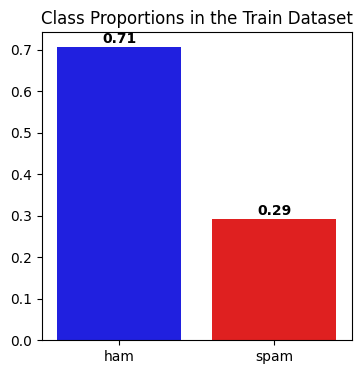

In [23]:
y_train_flat=y_train.reshape(-1)
y_train_series = pd.Series(y_train_flat)

class_prop = y_train_series.value_counts(normalize=True)
ax=sns.barplot(x=class_prop.index, y=class_prop.values, palette=['blue', 'red'])
for i, v in enumerate(class_prop.values):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', fontweight='bold')
plt.title('Class Proportions in the Train Dataset');


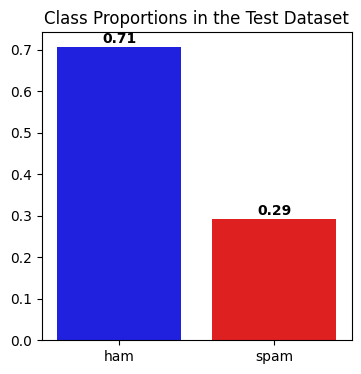

In [24]:
y_test_flat=y_test.reshape(-1)
y_test_series = pd.Series(y_test_flat)

class_prop = y_test_series.value_counts(normalize=True)
ax=sns.barplot(x=class_prop.index, y=class_prop.values, palette=['blue', 'red'])
for i, v in enumerate(class_prop.values):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', fontweight='bold')
plt.title('Class Proportions in the Test Dataset');


###As we can confirm no Bias was introduced in the Split process, the proportion from the original dataset was mantained.

#Feature Extraction.

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/nlp.jpg">

####The approach chosed is TfidfVectorizer. In this bag-of-words representation each document is represented as a vector of term frequencies (TF) weighted by their inverse document frequency (IDF). Lower weights are given to common words, rare receive higher weights.

In [218]:
#Back to dataframe format
X_train= pd.DataFrame(X_train,columns=['message'])
X_test= pd.DataFrame(X_test,columns=['message'])

In [219]:
text = X_train.message

# Creates TF-IDF Vector
vectorizer = TfidfVectorizer()

# Fit vector to data
vectorizer.fit(text)

# transform into a matrix of TF-IDF
X_train_tfidf = vectorizer.transform(text)

# Transform the into a dense matrix 
X_train_dense = X_train_tfidf.toarray()

##Comparing the results before and after TF-IDF

In [220]:
X_train.message

0       Subject : hi paliourg available meds . availab...
1        Subject : : meter 1550 per gas control , 18 th .
2       Subject : : waha hubco appologize , forgot one...
3       Subject : calpine daily gas nomination monthly...
4       Subject : hate condoms , need stay safe ? stay...
                              ...                        
3490    Subject : super cheap rates best sexual health...
3491    Subject : sitara # 92886 febo 0 , gas taken gl...
3492    Subject : new contact devon please note leavin...
3493    Subject : canvas 2005 cable v de 5 rambler f r...
3494    Subject : devon understand guys want talk devo...
Name: message, Length: 3495, dtype: object

In [221]:
X_train_dense

array([[0.18036729, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/eda.jpg">

###In the EDA stage we will check the most repeated words in both groups and also the distribution using Boxsplots

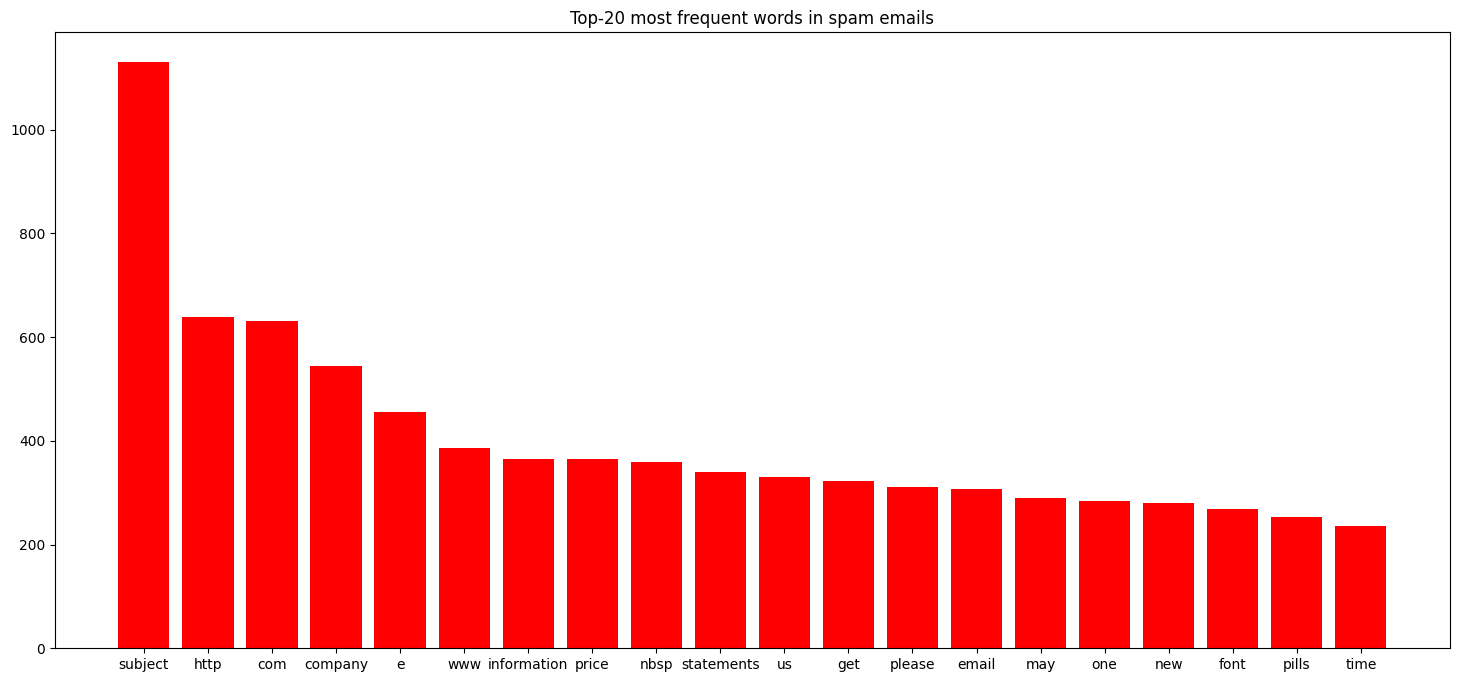

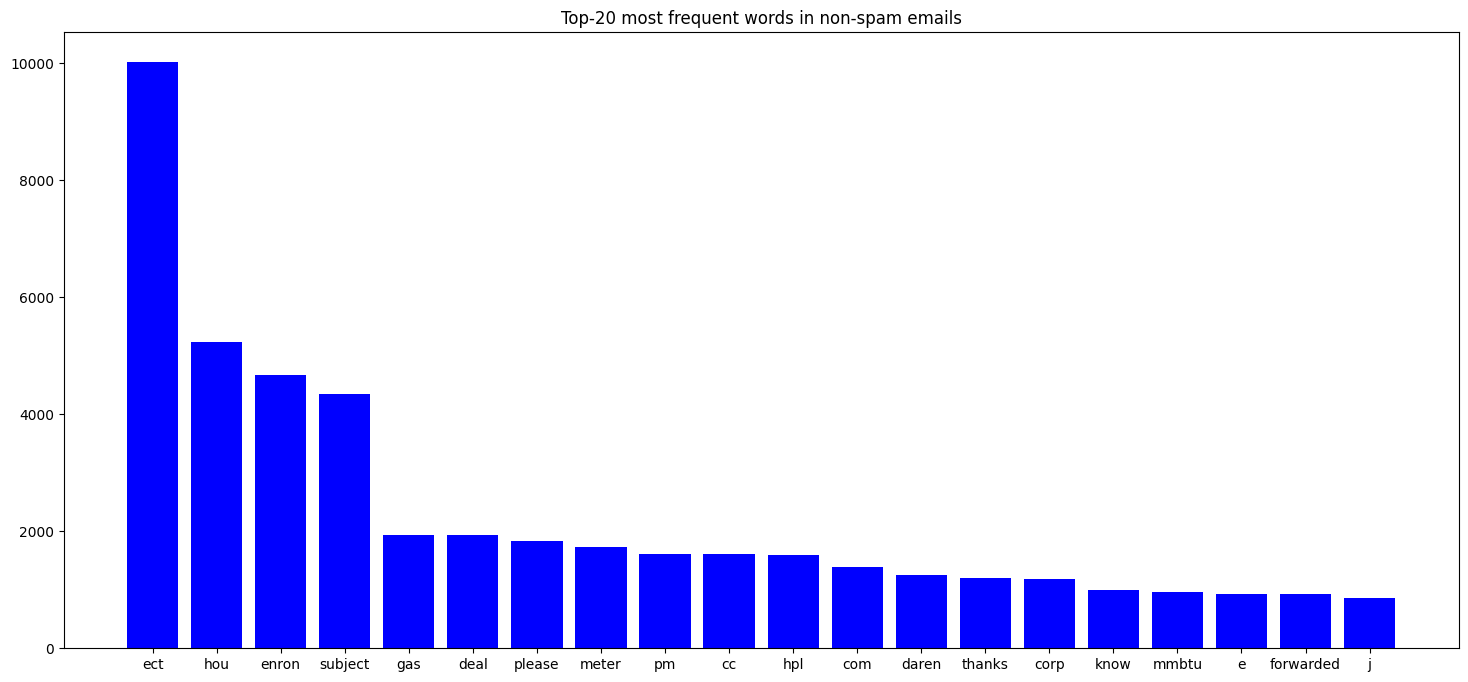

In [37]:
#Ref.: https://www.projectpro.io/recipes/add-custom-stopwords-and-then-remove-them-from-text
# Separate the train data into spam and non-spam categories
spam = X_train[y_train == 'spam']
non_spam=X_train[y_train == 'ham']

# Create vector with spam and non-spam and make sure that those are not including stop_words
spam_words = []
for message in spam['message']:
    words = word_tokenize(message.lower())
    spam_words += [word for word in words if word.isalpha() and word not in stop_words]

non_spam_words = []
for message in non_spam['message']:
    words = word_tokenize(message.lower())
    non_spam_words += [word for word in words if word.isalpha() and word not in stop_words]

# Count the frequency of each token in each category
spam_word_freq = nltk.FreqDist(spam_words)
non_spam_word_freq = nltk.FreqDist(non_spam_words)

# Create a dictionary that maps each token to its frequency
spam_top_words = dict(spam_word_freq.most_common(20))
non_spam_top_words = dict(non_spam_word_freq.most_common(20))

#Ref.: Part of this list comprehension was developed with ChatGPT assistance  
# Sort the dictionary in descending order of the frequency
spam_top_words = {k: v for k, v in sorted(spam_top_words.items(), key=lambda item: item[1], reverse=True)}
non_spam_top_words = {k: v for k, v in sorted(non_spam_top_words.items(), key=lambda item: item[1], reverse=True)}

# Create a bar plot to show the relative frequencies
plt.figure(figsize=(18,8))
plt.bar(range(len(spam_top_words)), list(spam_top_words.values()), align='center', color='red')
plt.xticks(range(len(spam_top_words)), list(spam_top_words.keys()))
plt.title('Top-20 most frequent words in spam emails')
plt.show()
plt.figure(figsize=(18,8))
plt.bar(range(len(non_spam_top_words)), list(non_spam_top_words.values()), align='center', color='blue')
plt.xticks(range(len(non_spam_top_words)), list(non_spam_top_words.keys()))
plt.title('Top-20 most frequent words in non-spam emails')
plt.show()

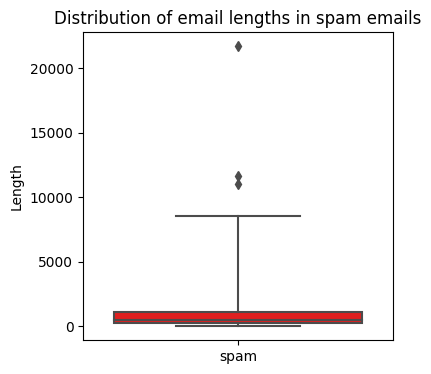

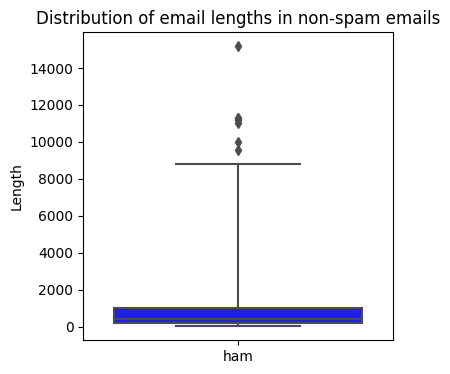

In [39]:
# Compute the length of each message
spam_length = spam['message'].apply(len)
non_spam_length = non_spam['message'].apply(len)

# Create a boxplot to show the distribution of email lengths
sns.boxplot(x=y_train[y_train=="spam"], y=spam_length, color='red', whis=10)
plt.title('Distribution of email lengths in spam emails')
plt.ylabel('Length')
plt.show()

sns.boxplot(x=y_train[y_train=="ham"], y=non_spam_length, color='blue', whis=10)
plt.title('Distribution of email lengths in non-spam emails')
plt.ylabel('Length')
plt.show()

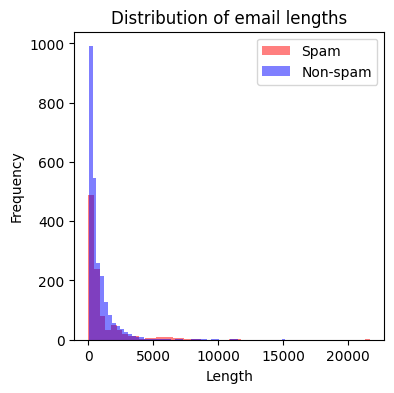

In [40]:
# Compute the length of each message
spam_length = spam['message'].apply(len)
non_spam_length = non_spam['message'].apply(len)

# Create histograms to show the distribution of email lengths
plt.hist(spam_length, bins=50, color='red', alpha=0.5)
plt.hist(non_spam_length, bins=50, color='blue', alpha=0.5)
plt.title('Distribution of email lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.legend(['Spam', 'Non-spam'])
plt.show()


###Calculate the average Size of Spam and Non-Spam messages

In [41]:
sum(spam['message'].apply(len))/len(spam['message'])

1038.1240234375

In [42]:
sum(non_spam['message'].apply(len))/len(non_spam['message'])

791.3063537029543

##On average the emails classified as Spam are bigger

---



###Now Let's examine inside the highest values(out-liers) for either Spam and Non-Spam:

In [ ]:
# Get the index of the message with the highest spam_length
max_spam_length_index = spam_length.idxmax()

# Get the value of y_train at the index with the highest spam_length
max_spam_length_category = y_train[max_spam_length_index]

# Print the content of the message with the highest spam_length
X_train.iloc[max_spam_length_index].message

###Part of the biggest Non-Spam Message. <br/>
<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/real.jpg">

In [ ]:
# Get the index of the message with the highest spam_length
max_non_spam_length_index = non_spam_length.idxmax()

# Get the value of y_train at the index with the highest spam_length
max_non_spam_length_category = y_train[max_non_spam_length_index]

# Print the content of the message with the highest spam_length
X_train.iloc[max_non_spam_length_index].message

###Part of the Biggest Spam Message. <br/>
<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/fake.jpg">



<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/lamp.jpg"> <br/>
###Interesting to note that in the malicious message, most of the words are in the body of the email and there are plenty of links and HTML code. Meanwhile, in the regular message, most of the words are email addresses there are in the "TO:" part of the message.

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/sup.jpg">

##Naive Bayes </br> <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/naive.jpg">

In [46]:
# Encode the text features using the TF-IDF vectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train.message)
vectorizer.get_feature_names_out()

array(['00', '000', '0000', ..., 'zzezrjok', 'zzocb', 'zzsyt'],
      dtype=object)

In [47]:
print(X_train_tfidf.shape)

(3495, 40904)


In [81]:
X_train_dense = X_train_tfidf.toarray()

# Train the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train_dense, y_train)

# Evaluate the classifier on the test data
X_test_tfidf = vectorizer.transform(X_test.message)
X_test_dense = X_test_tfidf.toarray()
y_pred = model.predict(X_test_dense)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [82]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 95.53%


In [83]:
# Print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1025   35]
 [  32  407]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.97      0.97      1060
        spam       0.92      0.93      0.92       439

    accuracy                           0.96      1499
   macro avg       0.95      0.95      0.95      1499
weighted avg       0.96      0.96      0.96      1499



<img src="https://github.com/orlandojrps/spam/blob/main/matrix.png?raw=true" heigh="100">

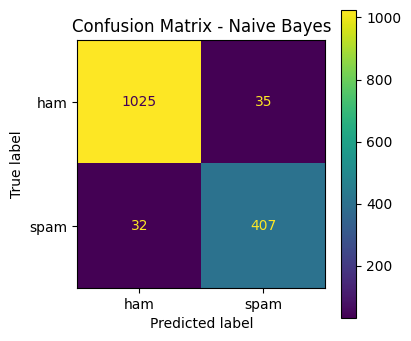

In [65]:
#Ref.: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
disp = ConfusionMatrixDisplay.from_estimator(model, X_test_dense, y_test)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/errors.png">

In [66]:
# False Positives: Type 1 error
fp = conf_matrix[0,1]

# False negatives: Type 2 error
fn = conf_matrix[1,0]

print(f"Type 1 errors: {fp}")
print(f"Type 2 errors: {fn}")

Type 1 errors: 35
Type 2 errors: 32


<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/pickle.png">

In [67]:
# Save the model to disk using the pickle module
filename = 'spam_classifier_model_naive.sav'
pickle.dump(model, open(filename, 'wb'))  

###Approach using Cross Fold Validation  <br>                                    <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/kfold2.png">

In [71]:
#Ref.: https://www.youtube.com/watch?v=1AGuK_8LkGQ

# Train the Naive Bayes classifier using 10-fold cross-validation
#model = GaussianNB()
scores = cross_val_score(model, X_test_dense, y_test, cv=10)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Cross-validation scores: [0.96       0.93333333 0.97333333 0.96666667 0.92666667 0.95333333
 0.96666667 0.96       0.96666667 0.91946309]
Mean cross-validation score: 0.9526129753914988


##Logistic Regression <br/> <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/lr.jpg">

In [88]:
# Train the logistic regression classifier
model_LR = LogisticRegression(random_state=4938) #My Student Number
model_LR.fit(X_train_dense, y_train)

# Evaluate the classifier on the test data
X_test_tfidf = vectorizer.transform(X_test.message)
X_test_dense = X_test_tfidf.toarray()
y_pred = model_LR.predict(X_test_dense)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 98.73%


In [90]:
# Print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1043   17]
 [   2  437]]

Classification Report:
              precision    recall  f1-score   support

         ham       1.00      0.98      0.99      1060
        spam       0.96      1.00      0.98       439

    accuracy                           0.99      1499
   macro avg       0.98      0.99      0.98      1499
weighted avg       0.99      0.99      0.99      1499



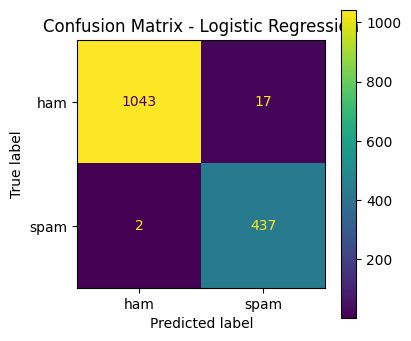

In [91]:
disp = ConfusionMatrixDisplay.from_estimator(model_LR, X_test_dense, y_test)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/errors.png">

In [92]:
# False Positives: Type 1 error
fp = conf_matrix[0,1]

# False negatives: Type 2 error
fn = conf_matrix[1,0]

print(f"Type 1 errors: {fp}")
print(f"Type 2 errors: {fn}")

Type 1 errors: 17
Type 2 errors: 2


###Approach using Cross Fold Validation  <br>                                    <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/kfold2.png">

In [93]:
#Ref.: https://www.youtube.com/watch?v=1AGuK_8LkGQ

# logistic regression classifier using 10-fold cross-validation
#model = GaussianNB()
scores = cross_val_score(model_LR, X_test_dense, y_test, cv=10)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

Cross-validation scores: [0.95333333 0.96       0.95333333 0.96666667 0.97333333 0.96
 0.99333333 0.98       0.96       0.94630872]
Mean cross-validation score: 0.9646308724832213


##Decision Tree <br/> <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/decision_tree.png">

In [94]:
# Train the decision tree classifier
model_DT = DecisionTreeClassifier(random_state=4938) #My Student Number
model_DT.fit(X_train_dense, y_train)

# Evaluate the classifier on the test data
X_test_tfidf = vectorizer.transform(X_test.message)
X_test_dense = X_test_tfidf.toarray()
y_pred = model_DT.predict(X_test_dense)

In [95]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 94.26%


In [96]:
# Print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1011   49]
 [  37  402]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.96      0.95      0.96      1060
        spam       0.89      0.92      0.90       439

    accuracy                           0.94      1499
   macro avg       0.93      0.93      0.93      1499
weighted avg       0.94      0.94      0.94      1499



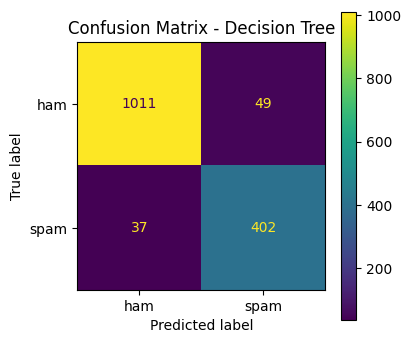

In [97]:
disp = ConfusionMatrixDisplay.from_estimator(model_DT, X_test_dense, y_test)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/errors.png">

In [98]:
# False Positives: Type 1 error
fp = conf_matrix[0,1]

# False negatives: Type 2 error
fn = conf_matrix[1,0]

print(f"Type 1 errors: {fp}")
print(f"Type 2 errors: {fn}")

Type 1 errors: 49
Type 2 errors: 37


###Approach using Cross Fold Validation  <br>                                    <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/kfold2.png">

In [99]:
#Ref.: https://www.youtube.com/watch?v=1AGuK_8LkGQ

# Decision tree classifier using 10-fold cross-validation
#model = GaussianNB()
scores = cross_val_score(model_DT, X_test_dense, y_test, cv=10)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.96       0.93333333 0.92       0.92       0.91333333 0.93333333
 0.95333333 0.91333333 0.90666667 0.87919463]
Mean cross-validation score: 0.9232527964205817


##Random Forest <br/> <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/rf.png">

In [101]:
# Train the random forest classifier
model_RF = RandomForestClassifier(random_state=4938) #My Student Number
model_RF.fit(X_train_dense, y_train)

# Evaluate the classifier on the test data
X_test_tfidf = vectorizer.transform(X_test.message)
X_test_dense = X_test_tfidf.toarray()
y_pred = model_RF.predict(X_test_dense)

<ipython-input-101-4d1038af8955>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_RF.fit(X_train_dense, y_train)


In [102]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.73%


In [103]:
# Print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1033   27]
 [   7  432]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.99      0.97      0.98      1060
        spam       0.94      0.98      0.96       439

    accuracy                           0.98      1499
   macro avg       0.97      0.98      0.97      1499
weighted avg       0.98      0.98      0.98      1499



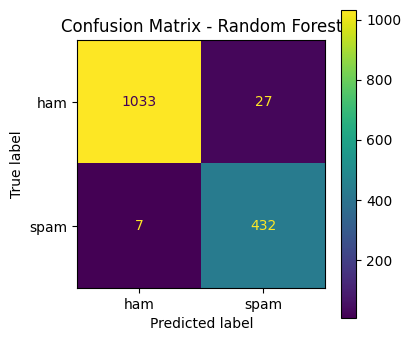

In [104]:
disp = ConfusionMatrixDisplay.from_estimator(model_RF, X_test_dense, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/errors.png">

In [106]:
# False Positives: Type 1 error
fp = conf_matrix[0,1]

# False negatives: Type 2 error
fn = conf_matrix[1,0]

print(f"Type 1 errors: {fp}")
print(f"Type 2 errors: {fn}")

Type 1 errors: 27
Type 2 errors: 7


###Approach using Cross Fold Validation  <br>                                    <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/kfold2.png">

In [107]:
#Ref.: https://www.youtube.com/watch?v=1AGuK_8LkGQ

# Random forest classifier using 10-fold cross-validation
#model = GaussianNB()
scores = cross_val_score(model_RF, X_test_dense, y_test, cv=10)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 

Cross-validation scores: [0.96       0.94666667 0.94666667 0.96666667 0.96666667 0.98666667
 0.98       0.98       0.96       0.94630872]
Mean cross-validation score: 0.9639642058165547


##KNN <br/> <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/KNN.jpg">

In [118]:
# Train the KNN classifier
np.random.seed(4938) #My Student Number
model_knn = KNeighborsClassifier()
model_knn.fit(X_train_dense, y_train)

# Evaluate the classifier on the test data
X_test_tfidf = vectorizer.transform(X_test.message)
X_test_dense = X_test_tfidf.toarray()
y_pred = model_knn.predict(X_test_dense)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [119]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 97.00%


In [120]:
# Print the confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[1050   10]
 [  35  404]]

Classification Report:
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1060
        spam       0.98      0.92      0.95       439

    accuracy                           0.97      1499
   macro avg       0.97      0.96      0.96      1499
weighted avg       0.97      0.97      0.97      1499



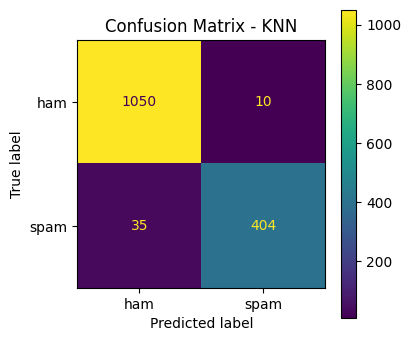

In [121]:
disp = ConfusionMatrixDisplay.from_estimator(model_knn, X_test_dense, y_test)
plt.title("Confusion Matrix - KNN")
plt.show()

<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/errors.png">

In [122]:
# False Positives: Type 1 error
fp = conf_matrix[0,1]

# False negatives: Type 2 error
fn = conf_matrix[1,0]

print(f"Type 1 errors: {fp}")
print(f"Type 2 errors: {fn}")

Type 1 errors: 10
Type 2 errors: 35


###Approach using Cross Fold Validation  <br>                                    <img src="https://raw.githubusercontent.com/orlandojrps/spam/main/kfold2.png">

In [124]:
#Ref.: https://www.youtube.com/watch?v=1AGuK_8LkGQ

# KNN classifier using 10-fold cross-validation
#model = GaussianNB()
scores = cross_val_score(model_knn, X_test_dense, y_test, cv=10)

# Print the cross-validation scores
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Cross-validation scores: [0.97333333 0.96       0.96666667 0.96       0.96       0.98
 0.98       0.96       0.93333333 0.95302013]
Mean cross-validation score: 0.9626353467561521


###Models Summary

In [130]:
print("Training accuracy Naive Bayes:{:.2f}%".format( model.score(X_test_dense,y_test) * 100), "\n")
print("Training accuracy Logistic Regression:{:.2f}%".format(model_LR.score(X_test_dense,y_test) * 100), "\n")
print("Training accuracy Decision Tree:{:.2f}%".format(model_DT.score(X_test_dense,y_test) * 100), "\n") 
print("Training accuracy Random Forest:{:.2f}%".format(model_RF.score(X_test_dense,y_test) * 100), "\n")
print("Training accuracy KNN:{:.2f}%".format(model_knn.score(X_test_dense,y_test) * 100), "\n")

Training accuracy Naive Bayes:95.53% 

Training accuracy Logistic Regression:98.73% 

Training accuracy Decision Tree:94.26% 

Training accuracy Random Forest:97.73% 

Training accuracy KNN:97.00% 



<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/nlp2.png">

##Let's try a new approach, this time using Word2Vec 

####Prepare Corpus and Process Using Spacy

####Ref: Dr. Haithem Afli Lectures

In [133]:
spacy_nlp = spacy.load("en_core_web_lg")

In [134]:
documents = [((row[1]['classification']), \
              list(spacy_nlp(row[1]['message']).vector)) \
                  for row in PROG_BAR(df.iterrows())]

0it [00:00, ?it/s]

Disassemble the documents list to make a data frame for modelling.

In [136]:
doc_avg_feat_vec = [d[1] for d in PROG_BAR(documents)]

fileids = [doc[0][0] for doc in documents]
classification = [doc[0] for doc in documents]

embedding_df = pd.DataFrame(doc_avg_feat_vec)
embedding_df['fileids'] = fileids
embedding_df['classif'] = classification
embedding_df

  0%|          | 0/4994 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,fileids,classif
0,-1.332022,-1.892263,0.527773,1.985225,4.140090,-0.736490,1.116616,2.094030,-1.110013,-1.432957,...,-2.633597,-1.363503,0.267080,1.355662,-0.297364,-0.509606,0.107371,-1.391560,h,ham
1,-0.932460,-2.314256,1.686281,0.743546,2.373665,-0.188444,0.795046,0.626023,-0.602484,-1.509617,...,0.126515,-1.057001,0.810938,0.946370,-0.015995,-0.917629,0.539223,-0.476399,h,ham
2,-0.513657,-1.239042,-0.063641,0.326575,3.362096,-0.465526,0.502676,1.918475,-1.352981,-0.518508,...,0.178812,-0.798848,0.076939,1.000810,0.133972,-1.301721,-1.320935,0.568108,h,ham
3,-1.595366,-0.056980,-0.362748,2.702515,3.622755,-0.258132,1.149102,2.656909,-2.802253,-0.662734,...,-3.087524,-1.582597,-0.738772,1.339150,-0.594903,-0.496338,-0.629215,-1.191007,h,ham
4,-0.910030,-1.242047,0.381572,1.538558,4.150530,-0.759299,0.793261,2.336686,-1.159360,-1.102586,...,0.048246,0.013129,-0.060457,1.141958,0.408210,-2.509590,-1.431595,-1.053061,h,ham
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4989,-1.094393,0.140323,-2.285008,0.356164,3.452671,-0.113406,-0.038093,3.457645,-1.047824,-0.069760,...,0.580048,-0.951962,-1.254016,0.979862,-0.331841,-1.196767,-2.219989,0.491147,s,spam
4990,0.079001,0.025977,-1.309338,-0.557254,1.299973,-0.034427,0.593223,1.696794,-2.101431,0.291290,...,0.895047,-0.851262,-0.812156,0.962624,-0.306156,-0.469448,-2.383094,0.797571,s,spam
4991,-0.491977,0.017550,-1.513908,0.454296,2.965373,0.691053,0.307116,3.448378,-2.098753,0.372322,...,-0.332547,-1.647038,-1.109861,0.725330,-0.374233,0.478900,-1.515850,-0.052718,s,spam
4992,-0.445236,-0.580229,0.556597,0.507158,2.977374,-0.445692,0.714365,1.417911,-1.749117,-0.910257,...,-0.033695,-0.783335,-0.407242,0.806517,0.944137,-0.899341,-1.159930,0.578709,s,spam


###making a copy to manipulate our dataset

In [137]:
dataset = embedding_df.copy()

###Examine the distribution of the classification targets

In [138]:
dataset['classif'].value_counts()

ham     3531
spam    1463
Name: classif, dtype: int64

###Extract features and target

In [231]:
X_W2V= dataset[dataset.columns.difference(['fileids','classif'])]
y_W2V= dataset['classif']

###Split the data into a training set, a validation set, and a test set

In [232]:
X_train_W2V, X_test_W2V, y_train_W2V, y_test_W2V \
    = sklearn.model_selection.train_test_split(X_W2V, y_W2V, random_state=4938, \
                                    train_size = 0.7) # 4938 my student number

In [233]:
y_train_W2V.shape, y_test_W2V.shape

((3495,), (1499,))

In [234]:
X_train

,message
0,Subject : hi paliourg available meds . availab...
1,"Subject : : meter 1550 per gas control , 18 th ."
2,"Subject : : waha hubco appologize , forgot one..."
3,Subject : calpine daily gas nomination monthly...
4,"Subject : hate condoms , need stay safe ? stay..."
...,...
3490,Subject : super cheap rates best sexual health...
3491,"Subject : sitara # 92886 febo 0 , gas taken gl..."
3492,Subject : new contact devon please note leavin...
3493,Subject : canvas 2005 cable v de 5 rambler f r...


In [235]:
X_train_W2V

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
3690,-1.093464,0.150959,-0.470827,0.446290,1.591034,0.210351,1.155914,1.171861,-0.873711,-0.116693,...,0.397250,-0.098673,0.199353,-0.882500,-0.908594,0.199075,0.005276,-0.235066,-1.001371,0.090167
2723,-1.395096,-0.083411,-1.563870,-0.250608,3.019282,-0.956812,0.845551,2.102117,-0.074671,-1.066594,...,-0.079791,0.649738,1.653396,-2.127069,-1.372493,0.532247,0.305615,-0.330101,-2.151494,-0.522999
3906,-1.027020,0.369901,-1.035377,0.759155,3.098729,0.241150,0.888841,2.330466,-2.187844,-0.434040,...,-0.842515,0.294552,-0.267768,-1.127698,-0.759109,1.024795,-0.654030,-0.899090,-1.832189,-0.253897
597,-1.612821,0.399340,-1.285004,0.262963,3.471442,0.019753,0.594406,2.932092,-0.641279,-0.696450,...,0.503988,0.051172,0.005295,-0.180795,-0.653486,1.164179,0.082640,-2.015793,-1.736564,0.998680
3221,-2.246782,-0.607255,0.418808,3.996385,5.149291,-0.319265,1.713962,2.564169,-2.429966,-1.868245,...,-1.015065,1.720813,-4.086110,-1.549787,-0.257354,1.938733,-0.992737,-0.570889,0.535337,-2.471185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,-0.365352,1.416622,-1.986498,-0.806925,2.311720,0.659582,0.471825,2.842541,-2.402186,-0.008695,...,-0.141754,0.586322,1.022433,-2.061373,-0.620311,1.479742,-0.112325,-0.868052,-3.389005,0.997585
2464,-1.191597,0.710863,-1.454548,-1.091293,1.090083,0.278768,0.400789,2.658662,-1.829957,-0.340416,...,0.872361,0.094268,0.823189,-1.535628,-1.135469,0.852802,0.168035,-0.785042,-2.709204,1.218941
4546,-0.005675,-0.769908,1.041978,0.204251,2.713972,-0.278652,0.794353,0.968482,-1.706209,-0.733866,...,-0.346856,0.810217,0.122420,-1.322629,-0.310991,1.012273,0.063987,-0.969087,-1.114301,0.101966
1539,-2.048110,-0.335920,0.890064,4.173786,4.805041,-0.416322,1.959067,2.770884,-2.645318,-1.808720,...,-0.759064,1.692246,-4.835859,-1.768168,-0.190996,1.973550,-0.754654,-0.437335,0.277399,-2.563190


###A Simple Model - Naive Bayes

In [341]:
np.random.seed(4938) #My Student Number
model_NB_V2 = KNeighborsClassifier()

In [342]:
model_NB_V2.fit(X_train_W2V, y_train_W2V)

KNeighborsClassifier()

###Evaluating Model Performance

###Assess the performance of the model on the test dataset

In [343]:
# Make a set of predictions for the validation data
y_pred_W2V = model_NB_V2.predict(X_test_W2V)

# Print performance details
accuracy = sklearn.metrics.accuracy_score(y_test_W2V, y_pred_W2V) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(sklearn.metrics.classification_report(y_test_W2V, y_pred_W2V))

# Print nicer confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test_W2V, y_pred_W2V, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9192795196797865
              precision    recall  f1-score   support

         ham       0.94      0.95      0.94      1058
        spam       0.87      0.86      0.86       441

    accuracy                           0.92      1499
   macro avg       0.90      0.90      0.90      1499
weighted avg       0.92      0.92      0.92      1499

Confusion Matrix


Predicted,ham,spam,All
True,,,
ham,1000,58,1058
spam,63,378,441
All,1063,436,1499


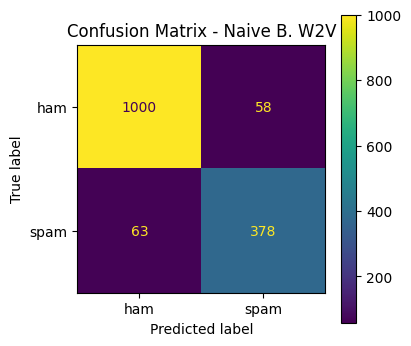

In [344]:
disp = ConfusionMatrixDisplay.from_estimator(model_NB_V2, X_test_W2V, y_test_W2V)
plt.title("Confusion Matrix - Naive B. W2V")
plt.show()

In [345]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test_W2V, y_pred_W2V)

# Print the accuracy
print("Accuracy Naive Bayes Using Word2Vec: {:.2f}%".format(accuracy * 100))

Accuracy Naive Bayes Using Word2Vec: 91.93%


In [346]:
# Predict the probabilities of the test set instances belonging to each class
y_proba_W2V = model_NB_V2.predict_proba(X_test_W2V)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_W2V, y_proba_W2V[:, 1])
print('ROC AUC:', roc_auc)

ROC AUC: 0.9659917527187308


Text(0.5, 1.0, 'ROC Curve Naive Bayes - Word2Vec')

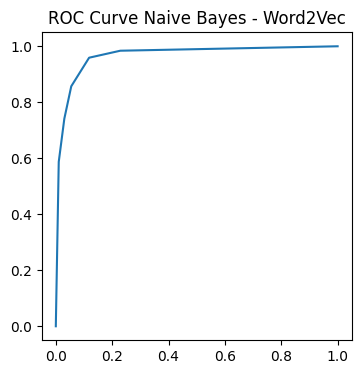

In [347]:
# Convert string labels to binary labels
le = LabelEncoder()
y_test_bin = le.fit_transform(y_test_W2V)
lr_W2V_proba = model_NB_V2.predict_proba(X_test_W2V)[:, 1]
lr_W2V_proba
#lr_proba_int = lr_proba.astype(int)
lr_fpr, lr_tpr, _ = roc_curve(y_test_bin, lr_W2V_proba)
plt.plot(lr_fpr, lr_tpr, label='Naive Bayes')
plt.title('ROC Curve Naive Bayes - Word2Vec')

###A Simple Model - Logistic Regression

In [348]:
# Train a logistic regression model - Word2Vec
lr_W2V = LogisticRegression()
lr_W2V.fit(X_train_W2V, y_train_W2V)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [349]:
# Evaluate the trained model on the test set
y_pred_W2V = lr_W2V.predict(X_test_W2V)
accuracy = accuracy_score(y_test_W2V, y_pred_W2V)
print('Accuracy:', accuracy)


# Print nicer confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test_W2V, y_pred_W2V, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.9606404269513009
Confusion Matrix


Predicted,ham,spam,All
True,,,
ham,1029,29,1058
spam,30,411,441
All,1059,440,1499


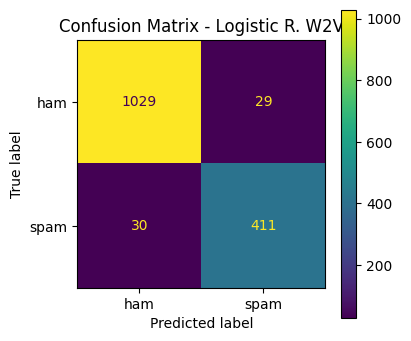

In [350]:
disp = ConfusionMatrixDisplay.from_estimator(lr_W2V, X_test_W2V, y_test_W2V)
plt.title("Confusion Matrix - Logistic R. W2V")
plt.show()

In [351]:
# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test_W2V, y_pred_W2V)

# Print the accuracy
print("Accuracy Logistic Regression Using Word2Vec: {:.2f}%".format(accuracy * 100))

Accuracy Logistic Regression Using Word2Vec: 96.06%


In [352]:
# Predict the probabilities of the test set instances belonging to each class
y_proba_W2V = lr_W2V.predict_proba(X_test_W2V)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_W2V, y_proba_W2V[:, 1])
print('ROC AUC:', roc_auc)

ROC AUC: 0.9866281736387056


Text(0.5, 1.0, 'ROC Curve Logistic Regression - Word2Vec')

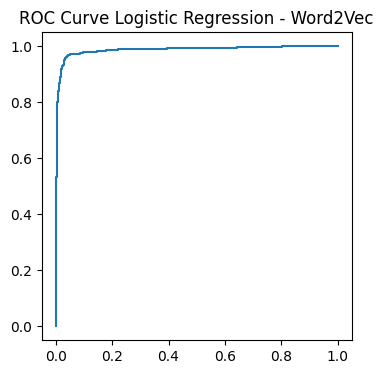

In [353]:
# Convert string labels to binary labels
le = LabelEncoder()
y_test_bin = le.fit_transform(y_test_W2V)
lr_W2V_proba = lr_W2V.predict_proba(X_test_W2V)[:, 1]
lr_W2V_proba
#lr_proba_int = lr_proba.astype(int)
lr_fpr, lr_tpr, _ = roc_curve(y_test_bin, lr_W2V_proba)
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression')
plt.title('ROC Curve Logistic Regression - Word2Vec')

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


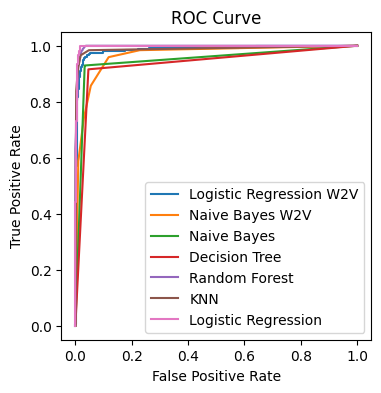

ROC AUC (Logistic Regression)W2V: 0.9866281736387056
ROC AUC (Naive Bayes W2V): 0.9659917527187308
ROC AUC (Naive Bayes): 0.9481454420423775
ROC AUC (Logistic Regression): 0.9974384321141531
ROC AUC (Decision Tree): 0.934745562384493
ROC AUC (Random Forest): 0.9969989684961534
ROC AUC (KNN): 0.9888275239609747


In [357]:
# Convert string labels to binary labels
le_W2V = LabelEncoder()
y_test_bin_W2V = le_W2V.fit_transform(y_test_W2V)

le = LabelEncoder()
y_test_bin = le.fit_transform(y_test)

# Predict the probabilities of the test set instances belonging to each class
lr_W2V_proba = lr_W2V.predict_proba(X_test_W2V)[:, 1]
nb_W2V_proba = model_NB_V2.predict_proba(X_test_W2V)[:, 1]

nb_proba = model.predict_proba(X_test_dense)[:, 1]
lr_proba = model_LR.predict_proba(X_test_dense)[:, 1]
dt_proba = model_DT.predict_proba(X_test_dense)[:, 1]
rf_proba = model_RF.predict_proba(X_test_dense)[:, 1]
knn_proba = model_knn.predict_proba(X_test_dense)[:, 1]

# Calculate the false positive rate and true positive rate for various thresholds
lr_fpr, lr_tpr, _ = roc_curve(y_test_bin_W2V, lr_W2V_proba)
nb_fpr, nb_tpr, _ = roc_curve(y_test_bin_W2V, nb_W2V_proba) 

nb1_fpr, nb1_tpr, _ = roc_curve(y_test_bin, nb_proba)
lr1_fpr, lr1_tpr, _ = roc_curve(y_test_bin, lr_proba)
dt_fpr, dt_tpr, _ = roc_curve(y_test_bin, dt_proba)
rf_fpr, rf_tpr, _ = roc_curve(y_test_bin, rf_proba)
knn_fpr, knn_tpr, _ = roc_curve(y_test_bin, knn_proba)

# Plot the ROC curves for all models
plt.plot(lr_fpr, lr_tpr, label='Logistic Regression W2V')
plt.plot(nb_fpr, nb_tpr, label='Naive Bayes W2V')
plt.plot(nb1_fpr, nb1_tpr, label='Naive Bayes')
plt.plot(dt_fpr, dt_tpr, label='Decision Tree')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.plot(knn_fpr, knn_tpr, label='KNN')
plt.plot(lr1_fpr, lr1_tpr, label='Logistic Regression')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculate the ROC AUC score for all models
lr_auc = roc_auc_score(y_test_W2V, lr_W2V_proba)
nb_auc = roc_auc_score(y_test_W2V, nb_W2V_proba)

nb1_auc = roc_auc_score(y_test, nb_proba)
lr1_auc = roc_auc_score(y_test, lr_proba)
dt_auc = roc_auc_score(y_test, dt_proba)
rf_auc = roc_auc_score(y_test, rf_proba)
knn_auc = roc_auc_score(y_test, knn_proba)

print('ROC AUC (Logistic Regression)W2V:', lr_auc)
print('ROC AUC (Naive Bayes W2V):', nb_auc)
print('ROC AUC (Naive Bayes):', nb1_auc)

print('ROC AUC (Logistic Regression):', lr1_auc)
print('ROC AUC (Decision Tree):', dt_auc)
print('ROC AUC (Random Forest):', rf_auc)
print('ROC AUC (KNN):', knn_auc)

<img rc="https://raw.githubusercontent.com/orlandojrps/spam/main/conclusion.png">

###Conclusion: <br/>
<img src="https://raw.githubusercontent.com/orlandojrps/spam/main/conclusion.png">

###In conclusion, based on the ROC AUC scores, the Logistic Regression and Random Forest models performed the best in the task, with scores of 0.997 and 0.996, respectively. The Naive Bayes and Decision Tree models had lower scores, while the KNN model had a moderate score. Word2Vec embeddings improved the performance of Naive Bayes model.